In [14]:
from selenium import webdriver
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import numpy as np

In [38]:
# 第一步 获取二手房面积等数据
# 启动浏览器
driver = webdriver.Edge()

# 打开网页
url_esf = 'https://esf.fang.com/house-a012-b01183/'
driver.get(url_esf)

string_list=[]

i=0

while i<20:
    
    table=driver.find_element('class name','shop_list.shop_list_4')#.text
    # Extract table rows
    rows = table.find_elements(By.CLASS_NAME, 'clearfix')

    # Initialize lists to store data
    data = []

    # Loop through rows and extract data
    for row in rows:
        cells = row.find_elements(By.CLASS_NAME, 'tel_shop')
        if cells:  # Skip rows without data (e.g., headers)
            row_data = [cell.text for cell in cells]
            data.append(row_data)

    df = pd.DataFrame(data)
    string_list.append(df)
    #driver.refresh()
    try:
        next_page=driver.find_element('class name','last')
        next_page.click()
        i+=1
    except NoSuchElementException:
        break

         # 关闭浏览器
driver.quit()


# 合并所有页面的数据
if string_list:
    df_full = pd.concat(string_list, ignore_index=True)
    
    # 命名表头
    df_full.columns=['area_esf']
    
    # 输出前几行数据查看
    print("\n前10行数据：")
    print(df_full.head(10))

    # 输出描述性统计信息
    print("描述性统计信息：")
    print(df_full.describe())

    # 将数据保存到 Excel 文件
    output_file = 'area_esf_TianTongYuan_ChangPing_data.xlsx'
    df_full.to_excel(output_file, index=False)  # 移除 encoding 参数
    print(f"\n数据已保存到 {output_file}")


前10行数据：
                                         area_esf
0    2室1厅 | 85.76㎡ | 底层 （共7层） | 东西向 | 2001年建 |张创业
1   2室2厅 | 106.67㎡ |中层 （共17层） | 西南向 | 2001年建 |张创业
2   3室1厅 | 127.38㎡ | 底层 （共7层） | 南北向 | 2001年建 |张创业
3   2室2厅 | 126.57㎡ | 底层 （共7层） | 南北向 | 2001年建 |张创业
4  6室4厅 | 283.75㎡ | 底层 （共10层） | 南北向 | 2008年建 |张创业
5  3室1厅 | 147.28㎡ |高层 （共7层） | 东西南北向 | 2001年建 |张创业
6   3室1厅 | 142.62㎡ |中层 （共16层） | 南北向 | 2004年建 |张创业
7   3室1厅 | 200.81㎡ |中层 （共32层） | 东南向 | 2002年建 |张创业
8   3室1厅 | 113.53㎡ |高层 （共29层） | 西南向 | 2004年建 |张创业
9   3室1厅 | 137.38㎡ | 底层 （共7层） | 南北向 | 2001年建 |张创业
描述性统计信息：
                                           area_esf
count                                           120
unique                                          113
top     2室1厅 | 87.51㎡ |顶层 （共6层） | 南北向 | 1999年建 |赵绍辉
freq                                              2

数据已保存到 area_esf_TianTongYuan_ChangPing_data.xlsx


In [40]:
#第二步 获取二手房总价和平米单价
# 启动浏览器
driver = webdriver.Edge()

# 打开网页
url_esf = 'https://esf.fang.com/house-a012-b01183/'
driver.get(url_esf)
string_list=[]

i=0

while i<20:
    
    table=driver.find_element('class name','shop_list.shop_list_4')#.text
    # Extract table rows
    rows = table.find_elements(By.CLASS_NAME, 'clearfix')

    # Initialize lists to store data
    data = []

    # Loop through rows and extract data

    
    for row in rows:
        cells = row.find_elements(By.CLASS_NAME, 'price_right')
        if cells:  # Skip rows without data (e.g., headers)
            row_data = [cell.text for cell in cells]
            data.append(row_data)

    df = pd.DataFrame(data)
    string_list.append(df)
    #driver.refresh()
    try:
        next_page=driver.find_element('class name','last')
        next_page.click()
        i+=1
    except NoSuchElementException:
        break

# 关闭浏览器


# 合并所有页面的数据
if string_list:
    df_full = pd.concat(string_list, ignore_index=True)

    # 命名表头
    df_full.columns=['price_esf']
    
    # 输出前10行数据
    print("\n前几行数据：")
    print(df_full.head(10))

    # 输出描述性统计信息
    print("描述性统计信息：")
    print(df_full.describe())

    # 将数据保存到 Excel 文件
    output_file = 'price_esf_TianTongYuan_ChangPing_data.xlsx'
    df_full.to_excel(output_file, index=False)  # 移除 encoding 参数
    print(f"\n数据已保存到 {output_file}")



前几行数据：
        price_esf
0  499万\n39174元/㎡
1  425万\n33578元/㎡
2  285万\n33232元/㎡
3  345万\n32342元/㎡
4  368万\n24986元/㎡
5  899万\n31682元/㎡
6  475万\n34575元/㎡
7  389万\n32183元/㎡
8  365万\n32150元/㎡
9  538万\n26791元/㎡
描述性统计信息：
             price_esf
count             1200
unique             636
top     330万\n36838元/㎡
freq                 9

数据已保存到 price_esf_TianTongYuan_ChangPing_data.xlsx


In [29]:
#第三步 获取租房的房屋面积
# 启动浏览器
driver = webdriver.Edge()

# 打开网页
url_zu = 'https://zu.fang.com/house-a012-b01183/'
driver.get(url_zu)
string_list=[]

i=0

while i<20:
    
    table=driver.find_element('class name','houseList')#.text
    # Extract table rows
    rows = table.find_elements(By.CLASS_NAME, 'list.hiddenMap.rel')

    # Initialize lists to store data
    data = []

    # Loop through rows and extract data
    for row in rows:
        cells = row.find_elements(By.CLASS_NAME, 'price')
        if cells:  # Skip rows without data (e.g., headers)
            row_data = [cell.text for cell in cells]
            data.append(row_data)

    df = pd.DataFrame(data)
    string_list.append(df)
    #driver.refresh()
    try:
        next_page=driver.find_element('class name','fanye')
        next_page.click()
        i+=1
    except NoSuchElementException:
        break

# 关闭浏览器
driver.quit()

# 合并所有页面的数据
if string_list:
    df_full = pd.concat(string_list, ignore_index=True)
    
    # 输出前几行数据检查
    print("\n前10行数据：")
    print(df_full.head(10))

    # 输出描述性统计信息
    print("描述性统计信息：")
    print(df_full.describe())

    # 将数据保存到 Excel 文件
    output_file = 'area_zu_TianTongYuan_ChangPing_data.xlsx'
    df_full.to_excel(output_file, index=False)  # 移除 encoding 参数
    print(f"\n数据已保存到 {output_file}")


前10行数据：
      0
0  5400
1  2200
2  1700
3  5200
4  4000
5  2450
6  1350
7  1800
8  1400
9  5200
描述性统计信息：
           0
count   1200
unique    61
top     1800
freq      80

数据已保存到 area_zu_TianTongYuan_ChangPing_data.xlsx


In [31]:
#第四步 获取租房的房租
# 启动浏览器
driver = webdriver.Edge()

# 打开网页
url_zu = 'https://zu.fang.com/house-a012-b01183/'
driver.get(url_zu)
string_list=[]

i=0

while i<20:
    
    table=driver.find_element('class name','houseList')#.text
    # Extract table rows
    rows = table.find_elements(By.CLASS_NAME, 'list.hiddenMap.rel')

    # Initialize lists to store data
    data = []

    # Loop through rows and extract data

    
    for row in rows:
        cells = row.find_elements(By.CLASS_NAME, 'font15.mt12.bold')
        if cells:  # Skip rows without data (e.g., headers)
            row_data = [cell.text for cell in cells]
            data.append(row_data)

    df = pd.DataFrame(data)
    string_list.append(df)
    #driver.refresh()
    try:
        next_page=driver.find_element('class name','fanye')
        next_page.click()
        i+=1
    except NoSuchElementException:
        break

# 关闭浏览器
driver.quit()

# 合并所有页面的数据
if string_list:
    df_full = pd.concat(string_list, ignore_index=True)
    
    # 输出前几行数据
    print("\n前10行数据：")
    print(df_full.head(10))

    # 输出描述性统计信息
    print("描述性统计信息：")
    print(df_full.describe())

    # 将数据保存到 Excel 文件
    output_file = 'rent_zu_TianTongYuan_ChangPing_data.xlsx'
    df_full.to_excel(output_file, index=False)  # 移除 encoding 参数
    print(f"\n数据已保存到 {output_file}")


前10行数据：
                  0
0   整租|2室1厅|100㎡|朝东
1  合租主卧|4户合租|17㎡|朝南
2  合租主卧|4户合租|28㎡|朝南
3  合租主卧|4户合租|15㎡|朝北
4   整租|2室1厅|119㎡|朝南
5  合租主卧|4户合租|20㎡|朝南
6  合租主卧|5户合租|10㎡|朝南
7  整租|2室1厅|104㎡|朝南北
8  合租主卧|4户合租|18㎡|朝北
9  合租主卧|5户合租|10㎡|朝北
描述性统计信息：
                       0
count                180
unique                94
top     合租单间|4户合租|15㎡|朝北
freq                   6

数据已保存到 rent_zu_TianTongYuan_ChangPing_data.xlsx


In [6]:
# 汇总小组的所有数据后，对每个数据集进行描述性统计和异常检查


# 定义文件路径
file_paths = [
    r"C:\Python&AI\HW3_DataMining_HousePrice\Huilongguan_ChangPing_data.xlsx",
    r"C:\Python&AI\HW3_DataMining_HousePrice\Huoying_ChangPing_data.xlsx",
    r"C:\Python&AI\HW3_DataMining_HousePrice\Shahe_ChangPing_data.xlsx",
    r"C:\Python&AI\HW3_DataMining_HousePrice\Tiantongyuan_ChangPing_data.xlsx"
]

# 定义数据集名称
dataset_names = ["Huilongguan", "Huoying", "Shahe", "Tiantongyuan"]

# 遍历每个数据集
for i, file_path in enumerate(file_paths):
    print(f"正在处理数据集: {dataset_names[i]}")
    
    # 读取 Excel 文件
    df = pd.read_excel(file_path)
    
    # 打印数据集的前几行
    print(f"\n数据集 {dataset_names[i]} 的前几行数据：")
    print(df.head())
    
    # 打印描述性统计信息
    print(f"\n数据集 {dataset_names[i]} 的描述性统计信息：")
    print(df.describe())
    
    # 检查缺失值
    print(f"\n数据集 {dataset_names[i]} 的缺失值情况：")
    print(df.isnull().sum())
    
    # 检查异常值（例如价格或面积为负数）
    print(f"\n数据集 {dataset_names[i]} 的异常值检查：")
    if (df['price(10k)'] < 0).any() or (df['m2'] < 0).any() or (df['rent'] < 0).any():
        print("警告：数据集中存在价格为负数或面积为负数的异常值！")
    else:
        print("未发现价格为负数或面积为负数的异常值。")
    
    # 打印分隔线
    print("\n" + "=" * 80 + "\n")

正在处理数据集: Huilongguan

数据集 Huilongguan 的前几行数据：
   esf  price(10k)      m2  price/m2  zu  rent  m2.1     rent/m2
0    1         618   98.00     63061   1  1100   125    8.800000
1    2         680  115.00     59130   2  5500   148   37.162162
2    3         985  251.61     39147   3  1600    16  100.000000
3    4         787  127.00     61968   4  5500    42  130.952381
4    5         670  108.00     62037   5  2700    19  142.105263

数据集 Huilongguan 的描述性统计信息：
              esf   price(10k)          m2      price/m2          zu  \
count  789.000000   789.000000  789.000000    789.000000  789.000000   
mean   395.000000   563.435995  111.426654  50972.472750  395.000000   
std    227.908973   305.571189   47.635055  11500.884839  227.908973   
min      1.000000    99.000000   32.210000  25764.000000    1.000000   
25%    198.000000   420.000000   89.360000  42521.000000  198.000000   
50%    395.000000   499.000000   99.660000  49512.000000  395.000000   
75%    592.000000   618.000000  1

In [8]:
# 将四个数据集合并

# 定义文件路径
file_paths = [
    r"C:\Python&AI\HW3_DataMining_HousePrice\Huilongguan_ChangPing_data.xlsx",
    r"C:\Python&AI\HW3_DataMining_HousePrice\Huoying_ChangPing_data.xlsx",
    r"C:\Python&AI\HW3_DataMining_HousePrice\Shahe_ChangPing_data.xlsx",
    r"C:\Python&AI\HW3_DataMining_HousePrice\Tiantongyuan_ChangPing_data.xlsx"
]

# 定义数据集名称和对应的 location 编号
dataset_names = ["Huilongguan", "Huoying", "Shahe", "Tiantongyuan"]
location_ids = [1, 2, 3, 4]  # 用 1, 2, 3, 4 区分四个位置

# 创建一个空列表，用于存储每个数据集
dataframes = []

# 遍历每个数据集，读取并添加 location 列
for i, file_path in enumerate(file_paths):
    # 读取 Excel 文件
    df = pd.read_excel(file_path)
    
    # 添加 location 列
    df['location'] = location_ids[i]
    
    # 将处理后的数据集添加到列表中
    dataframes.append(df)

# 合并所有数据集
combined_df = pd.concat(dataframes, ignore_index=True)

# 保存合并后的数据集到原文件夹
output_path = r"C:\Python&AI\HW3_DataMining_HousePrice\ChangPing_data.xlsx"
combined_df.to_excel(output_path, index=False)

print(f"数据集已成功合并并保存到: {output_path}")

数据集已成功合并并保存到: C:\Python&AI\HW3_DataMining_HousePrice\ChangPing_data.xlsx


每个 location 的 median price to rent ratio：
location
1    1752.380952
2    1875.000000
3    2369.565217
4    1687.228615
Name: price_to_rent_ratio, dtype: float64


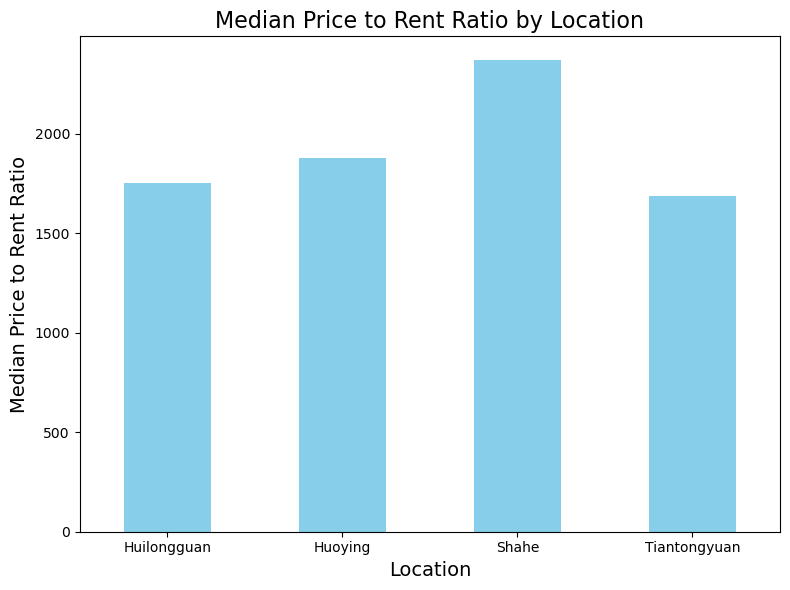

In [12]:
# 计算房价租金比并可视化

# 读取合并后的数据集
file_path = r"C:\Python&AI\HW3_DataMining_HousePrice\ChangPing_data.xlsx"
df = pd.read_excel(file_path)

# 计算 price to rent ratio
df['price_to_rent_ratio'] = df['price(10k)'] * 10000 / df['rent']  # 将 price(10k) 转换为元

# 按 location 分组，计算每个 location 的 median price to rent ratio
median_ratio_by_location = df.groupby('location')['price_to_rent_ratio'].median()

# 打印结果
print("每个 location 的 median price to rent ratio：")
print(median_ratio_by_location)

# 绘制柱状图
plt.figure(figsize=(8, 6))
median_ratio_by_location.plot(kind='bar', color='skyblue')

# 设置图表标题和标签
plt.title("Median Price to Rent Ratio by Location", fontsize=16)
plt.xlabel("Location", fontsize=14)
plt.ylabel("Median Price to Rent Ratio", fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Huilongguan', 'Huoying', 'Shahe', 'Tiantongyuan'], rotation=0)

# 显示图表
plt.tight_layout()
plt.show()

In [30]:

# 分别拟合两个预测模型

# 读取合并后的数据集
file_path = r"C:\Python&AI\HW3_DataMining_HousePrice\ChangPing_data.xlsx"
df = pd.read_excel(file_path)

# 拟合 Model 1: price/m2i = β0m2i + β2locationi + β2m2i × locationi + ϵi
# 提取 esf 部分的数据
esf_data = df[['m2', 'price/m2', 'location']].dropna()

# 添加交互项 (m2 * location)
esf_data['m2_location_interaction'] = esf_data['m2'] * esf_data['location']

# 定义自变量和因变量
X1 = esf_data[['m2', 'location', 'm2_location_interaction']]
X1 = sm.add_constant(X1)  # 添加常数列
y1 = esf_data['price/m2']

# 拟合模型
model1 = sm.OLS(y1, X1).fit()

# 输出 Model 1 的结果
print("Model 1 的回归结果：")
print(model1.summary())

# 拟合 Model 2: rent/m2i = β0m2i + β2locationi + β3m2i × locationi + ϵi
# 提取 zu 部分的数据
zu_data = df[['m2.1', 'rent/m2.1', 'location']].dropna()

# 添加交互项 (m2 * location)
zu_data['m2.1_location_interaction'] = zu_data['m2.1'] * zu_data['location']

# 定义自变量和因变量
X2 = zu_data[['m2.1', 'location', 'm2.1_location_interaction']]
X2 = sm.add_constant(X2)  # 添加常数列
y2 = zu_data['rent/m2.1']

# 拟合模型
model2 = sm.OLS(y2, X2).fit()

# 输出 Model 2 的结果
print("\nModel 2 的回归结果：")
print(model2.summary())

Model 1 的回归结果：
                            OLS Regression Results                            
Dep. Variable:               price/m2   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     542.2
Date:                Thu, 20 Mar 2025   Prob (F-statistic):          2.42e-285
Time:                        12:51:03   Log-Likelihood:                -35573.
No. Observations:                3233   AIC:                         7.115e+04
Df Residuals:                    3229   BIC:                         7.118e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const      

In [32]:
# 预测：use model 1 and model 2 to predict price and rent for the m2 = 50, m2 = 100



# 读取合并后的数据集
file_path = r"C:\Python&AI\HW3_DataMining_HousePrice\ChangPing_data.xlsx"
df = pd.read_excel(file_path)

# 定义预测函数
def predict_price(model, m2, location):
    """
    使用 Model 1 预测 price/m2
    """
    # 构造输入数据
    X = pd.DataFrame({
        'const': [1],
        'm2': [m2],
        'location': [location],
        'm2_location_interaction': [m2 * location]
    })
    return model.predict(X)[0]

def predict_rent(model, m2, location):
    """
    使用 Model 2 预测 rent/m2
    """
    # 构造输入数据
    X = pd.DataFrame({
        'const': [1],
        'm2': [m2],
        'location': [location],
        'm2_location_interaction': [m2 * location]
    })
    return model.predict(X)[0]

# 定义要预测的 m2 值
m2_values = [50, 100]

# 定义 location 值
locations = [1, 2, 3, 4]

# 预测 price/m2 和 rent/m2
print("预测结果：")
for m2 in m2_values:
    for location in locations:
        # 使用 Model 1 预测 price/m2
        predicted_price_per_m2 = predict_price(model1, m2, location)
        predicted_price = predicted_price_per_m2 * m2  # 计算总价

        # 使用 Model 2 预测 rent/m2
        predicted_rent_per_m2 = predict_rent(model2, m2, location)
        predicted_rent = predicted_rent_per_m2 * m2  # 计算总租金

        # 打印结果
        print(f"m2 = {m2}, location = {location}:")
        print(f"  Predicted price/m2: {predicted_price_per_m2:.2f}, Predicted total price: {predicted_price:.2f}")
        print(f"  Predicted rent/m2: {predicted_rent_per_m2:.2f}, Predicted total rent: {predicted_rent:.2f}")
        print("-" * 40)

预测结果：
m2 = 50, location = 1:
  Predicted price/m2: 49506.84, Predicted total price: 2475342.17
  Predicted rent/m2: 79.46, Predicted total rent: 3972.76
----------------------------------------
m2 = 50, location = 2:
  Predicted price/m2: 43492.89, Predicted total price: 2174644.39
  Predicted rent/m2: 79.20, Predicted total rent: 3959.81
----------------------------------------
m2 = 50, location = 3:
  Predicted price/m2: 37478.93, Predicted total price: 1873946.62
  Predicted rent/m2: 78.94, Predicted total rent: 3946.87
----------------------------------------
m2 = 50, location = 4:
  Predicted price/m2: 31464.98, Predicted total price: 1573248.84
  Predicted rent/m2: 78.68, Predicted total rent: 3933.92
----------------------------------------
m2 = 100, location = 1:
  Predicted price/m2: 51835.14, Predicted total price: 5183514.23
  Predicted rent/m2: 73.99, Predicted total rent: 7399.25
----------------------------------------
m2 = 100, location = 2:
  Predicted price/m2: 45962.2

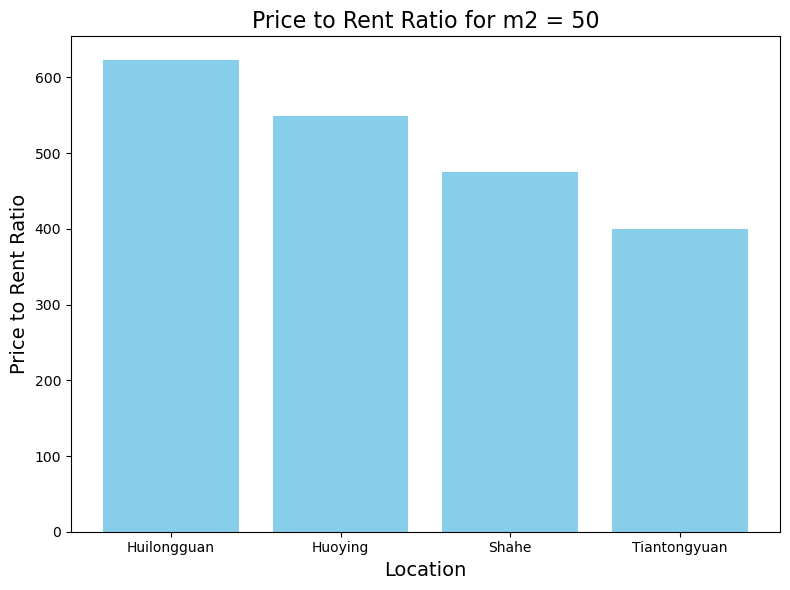

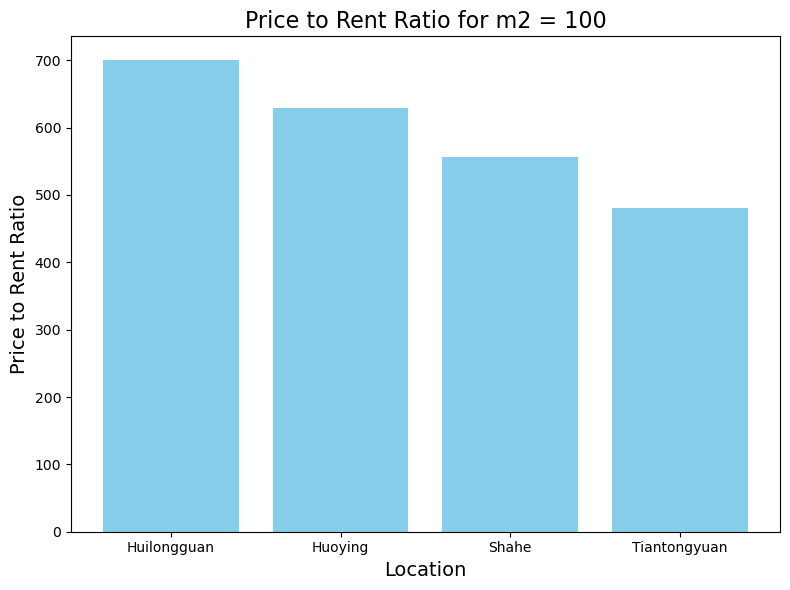

In [34]:
# Figure B and C: 可视化四个街区的房价租金比预测结果

# 读取合并后的数据集
file_path = r"C:\Python&AI\HW3_DataMining_HousePrice\ChangPing_data.xlsx"
df = pd.read_excel(file_path)

# 定义预测函数
def predict_price(model, m2, location):
    """
    使用 Model 1 预测 price/m2
    """
    # 构造输入数据
    X = pd.DataFrame({
        'const': [1],
        'm2': [m2],
        'location': [location],
        'm2_location_interaction': [m2 * location]
    })
    return model.predict(X)[0]

def predict_rent(model, m2, location):
    """
    使用 Model 2 预测 rent/m2
    """
    # 构造输入数据
    X = pd.DataFrame({
        'const': [1],
        'm2': [m2],
        'location': [location],
        'm2_location_interaction': [m2 * location]
    })
    return model.predict(X)[0]

# 定义要预测的 m2 值
m2_values = [50, 100]

# 定义 location 值
locations = [1, 2, 3, 4]
location_names = ['Huilongguan', 'Huoying', 'Shahe', 'Tiantongyuan']

# 存储 price to rent ratio 的结果
results = {m2: {'location': [], 'price_to_rent_ratio': []} for m2 in m2_values}

# 计算 price to rent ratio
for m2 in m2_values:
    for location in locations:
        # 使用 Model 1 预测 price/m2
        predicted_price_per_m2 = predict_price(model1, m2, location)
        predicted_price = predicted_price_per_m2 * m2  # 计算总价

        # 使用 Model 2 预测 rent/m2
        predicted_rent_per_m2 = predict_rent(model2, m2, location)
        predicted_rent = predicted_rent_per_m2 * m2  # 计算总租金

        # 计算 price to rent ratio
        price_to_rent_ratio = predicted_price / predicted_rent

        # 存储结果
        results[m2]['location'].append(location_names[location - 1])
        results[m2]['price_to_rent_ratio'].append(price_to_rent_ratio)

# 绘制柱状图
for m2 in m2_values:
    plt.figure(figsize=(8, 6))
    plt.bar(results[m2]['location'], results[m2]['price_to_rent_ratio'], color='skyblue')

    # 设置图表标题和标签
    plt.title(f"Price to Rent Ratio for m2 = {m2}", fontsize=16)
    plt.xlabel("Location", fontsize=14)
    plt.ylabel("Price to Rent Ratio", fontsize=14)

    # 显示图表
    plt.tight_layout()
    plt.show()